Running experiments: 2000 runs, 1000 steps each
Running strategy 1/6: ε=0 (greedy)
Running strategy 2/6: ε=0.01
Running strategy 3/6: ε=0.1
Running strategy 4/6: ε=1.0
Running strategy 5/6: Optimistic (Q₁=5, ε=0)
Running strategy 6/6: UCB (c=2)


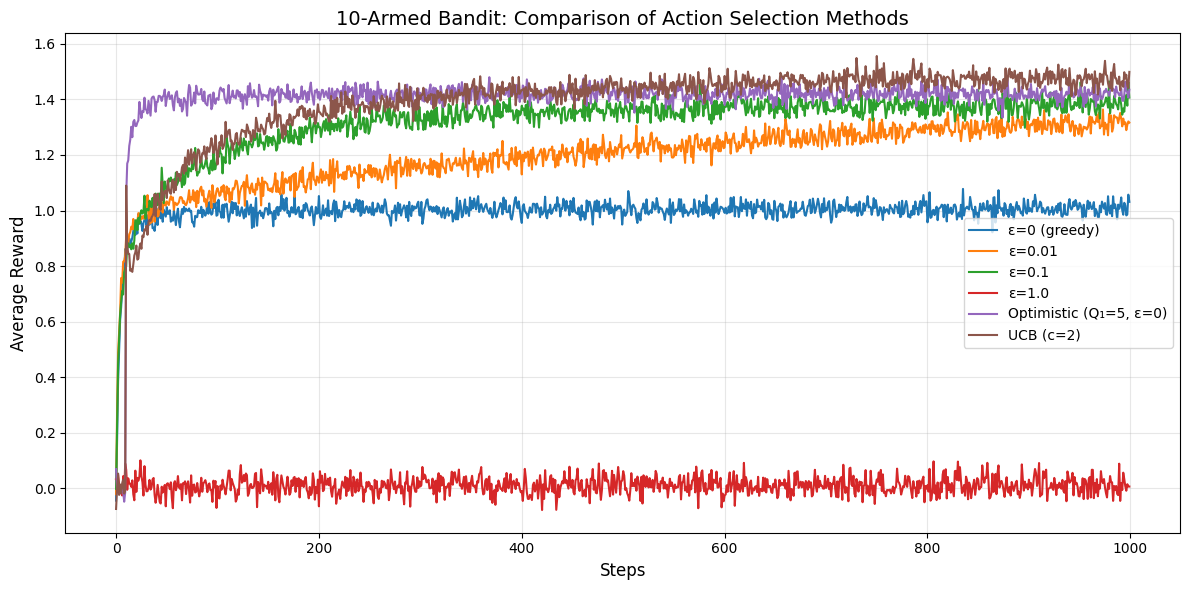


Final average rewards (last 100 steps):
ε=0 (greedy)                  : 1.008
ε=0.01                        : 1.310
ε=0.1                         : 1.384
ε=1.0                         : 0.012
Optimistic (Q₁=5, ε=0)        : 1.420
UCB (c=2)                     : 1.473


In [1]:
import numpy as np
import matplotlib.pyplot as plt

class KArmedBandit:
    def __init__(self, k=10):
        self.k = k
        self.q_true = np.random.randn(k)  # True action values from N(0,1)
    
    def pull(self, action):
        #Return reward from N(q*(action), 1)
        return np.random.randn() + self.q_true[action]
    
    def get_optimal_action(self):
        #Return the optimal action
        return np.argmax(self.q_true)


class Agent:
    #Agent that selects actions using different strategies
    def __init__(self, k=10, epsilon=0, initial_value=0, ucb_c=None):
        self.k = k
        self.epsilon = epsilon
        self.ucb_c = ucb_c
        self.Q = np.ones(k) * initial_value  # Action value estimates
        self.N = np.zeros(k)  # Action counts
        self.t = 0  # Time step
    
    def select_action(self):
        #Select action based on strategy
        if self.ucb_c is not None:
            # UCB action selection
            if self.t < self.k:
                return self.t  # Select each action once initially
            ucb_values = self.Q + self.ucb_c * np.sqrt(np.log(self.t + 1) / (self.N + 1e-5))
            return np.argmax(ucb_values)
        else:
            # ε-greedy action selection
            if np.random.rand() < self.epsilon:
                return np.random.randint(self.k)
            else:
                return np.argmax(self.Q)
    
    def update(self, action, reward):
        #Update action value estimates
        self.N[action] += 1
        self.Q[action] += (reward - self.Q[action]) / self.N[action]
        self.t += 1


def run_experiment(agent_config, n_steps=1000, n_runs=2000, k=10):
    #Run experiment for a specific agent configuration
    avg_rewards = np.zeros(n_steps)
    
    for run in range(n_runs):
        bandit = KArmedBandit(k=k)
        agent = Agent(k=k, **agent_config)
        
        for step in range(n_steps):
            action = agent.select_action()
            reward = bandit.pull(action)
            agent.update(action, reward)
            avg_rewards[step] += reward
    
    avg_rewards /= n_runs
    return avg_rewards


def main():
    #Run all experiments and plot results
    n_steps = 1000
    n_runs = 2000
    k = 10
    
    # Define strategies
    strategies = [
        {'name': 'ε=0 (greedy)', 'config': {'epsilon': 0}},
        {'name': 'ε=0.01', 'config': {'epsilon': 0.01}},
        {'name': 'ε=0.1', 'config': {'epsilon': 0.1}},
        {'name': 'ε=1.0', 'config': {'epsilon': 1.0}},
        {'name': 'Optimistic (Q₁=5, ε=0)', 'config': {'epsilon': 0, 'initial_value': 5}},
        {'name': 'UCB (c=2)', 'config': {'epsilon': 0, 'ucb_c': 2}}
    ]
    
    # Run experiments
    print(f"Running experiments: {n_runs} runs, {n_steps} steps each")
    results = {}
    
    for i, strategy in enumerate(strategies):
        print(f"Running strategy {i+1}/6: {strategy['name']}")
        results[strategy['name']] = run_experiment(strategy['config'], n_steps, n_runs, k)
    
    # Plot results
    plt.figure(figsize=(12, 6))
    
    for name, rewards in results.items():
        plt.plot(rewards, label=name, linewidth=1.5)
    
    plt.xlabel('Steps', fontsize=12)
    plt.ylabel('Average Reward', fontsize=12)
    plt.title('10-Armed Bandit: Comparison of Action Selection Methods', fontsize=14)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('bandit_comparison.png', dpi=150)
    plt.show()
    
    # Print final average rewards
    print("\nFinal average rewards (last 100 steps):")
    for name, rewards in results.items():
        final_avg = np.mean(rewards[-100:])
        print(f"{name:30s}: {final_avg:.3f}")


if __name__ == "__main__":
    main()